<a href="https://colab.research.google.com/github/josemiguelpulido/general-relativity/blob/main/CurvaturaTierra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Se atribuye a Erasthotenes la primera demostración de que la Tierra es redonda. Erasthotenes tambien proporcionó el cálculo del radio de la Tierra. Carl Sagan nos explica aquí su razonamiento: https://www.youtube.com/watch?v=G8cbIWMv0rI
:


En este notebook vamos a explicar las matemáticas del cálculo. Primero, vamos a ver todas las herramientas matemáticas que necesitaremos, y luego las pondremos en uso en el modelo que nos permitirá hacer el cálculo.

Empecemos por los básicos. Los antiguos griegos observaron que el ratio entre el perímetro y el diámetro de un círculo es el mismo para cualquier círculo. 


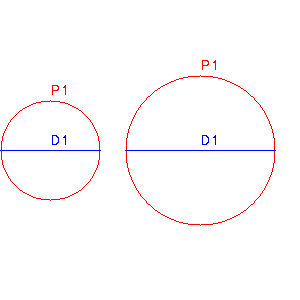

In [2]:
# https://datahacker.rs/draw-lines-rectangles-circles-write-text-on-images-with-opencv-in-python/
import cv2
import numpy as np
import matplotlib.pyplot as plt 
from google.colab.patches import cv2_imshow

img = np.zeros((300, 300, 3), dtype="uint8")
img[:] = (255,255,255)
font=cv2.FONT_HERSHEY_PLAIN

def draw_circle(x: int,y: int,radius: int,name: str):
  cv2.circle(img, (x,y), radius, (0,0,255), (1))
  cv2.putText(img, "P" + name, (x,y - radius - 5), font, 1, (0,0,255), 1, cv2.LINE_4)
  cv2.line(img, (x-radius,y), (x+radius,y), (255,0,0), (1))
  cv2.putText(img,"D"+name, (x,y-5), font, 1, (255,0,0), 1, cv2.LINE_4)

# Circle 1:
draw_circle(50,150,50,"1")

# Circle 2
draw_circle(200,150,75,"1")

cv2_imshow(img)

Para dos círculos 1 y 2, tenemos:

In [122]:
import sympy
from sympy import sin, cos, tan, atan, Eq

sympy.init_printing()  # for pretty printing

In [118]:
#@title
p1, d1 = sympy.symbols("P1 D1")
p2, d2 = sympy.symbols("P2 D2")

ratio = Eq(p2/d2,  p1/d1)
ratio


Esos antiguos griegos bautizaron este ratio con el nombre de la letra griega pi:


In [116]:
r, p, d, pi = sympy.symbols("R P D pi")
Eq(pi, p/d)

usando el radio en lugar del diámetro:

In [120]:
Eq(pi, p/(2*r))

In [121]:
Eq( p/r, 2*pi)

El perímetro representa al círculo completo. Si solo consideramos una parte del círculo, un arco de círculo, el ratio entre el arco y el radio sería variable, dependiendo del tamaño del arco. El valor de esta variable oscila entre 0 (correspondiente a arco nulo) y 2pi (correspondiente al arco igual a todo el perímetro del círculo) Denotamos esa variable como alpha:

In [117]:
a, alpha = sympy.symbols("A alpha")
Eq( a/r, alpha)

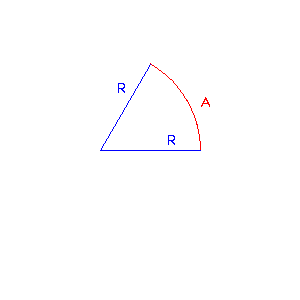

In [26]:
img = np.zeros((300, 300, 3), dtype="uint8")
img[:] = (255,255,255)
font=cv2.FONT_HERSHEY_PLAIN

def draw_arc(x: int,y: int,radius: int,angle: int,name: str="", display: int=0):
  
  cv2.ellipse(img, (x,y), (radius,radius), 0, 0, -angle, (0,0,255), (1))
  if display:
    cv2.ellipse(img, (x,y), (int(radius/4),int(radius/4)), 0, 0, -angle, (0,255,0), (1))
    cv2.putText(img,"alpha", (x+25,y-10), font, 0.7, (0,255,0), 1, cv2.LINE_4)

  cv2.line(img, (x,y), (x+radius,y), (255,0,0), (1))
  cv2.putText(img,"R"+name, (x+int(2*radius/3),y-5), font, 1, (255,0,0), 1, cv2.LINE_4)

  import math
  import numpy as np
  c1 = int(math.cos(angle*(np.pi/180)) * radius)
  c2 = int(math.sqrt((radius**2 - c1**2)))
  cv2.line(img, (x,y), (x+c1,y-c2), (255,0,0), (1))
  cv2.putText(img,"R"+name, (x+int(c1/3),y-int(2*c2/3)), font, 1, (255,0,0), 1, cv2.LINE_4)

  cv2.putText(img,"A"+name, (x+radius,y-int(c2/2)), font, 1, (0,0,255), 1, cv2.LINE_4)

  return (x+c1,y-c2)

draw_arc(100,150,100,60)



cv2_imshow(img)

Por otro lado, un arco queda definido por dos puntos en el perímetro del círculo. Esos dos puntos pueden ser unidos al centro del círculo mediante dos radios, que formarán un ángulo entre ellos. Si llevamos este mismo ángulo a otro círculo de diferente radio para definir el correspondiente arco, el ratio entre este nuevo arco y su radio será el mismo que el ratio entre el arco y radio del círculo original! 

In [ ]:
a1, r1 = sympy.symbols("A1 R1")
a2, r2 = sympy.symbols("A2 R2")

Eq(a1/r1, a2/r2)

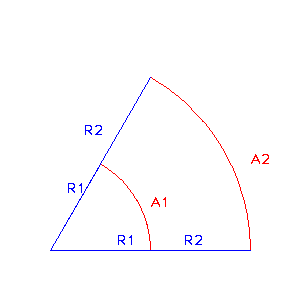

In [74]:
img = np.zeros((300, 300, 3), dtype="uint8")
img[:] = (255,255,255)
font=cv2.FONT_HERSHEY_PLAIN


draw_arc(50,250,100,60,"1")
draw_arc(50,250,200,60,"2")
cv2_imshow(img)

Esto significa que, en el caso de un círculo, un ángulo entre dos radios puede ser definido como el ratio entre el arco definidos por esos dos radios, y el valor del radio.


In [ ]:
Eq(alpha, a/r)

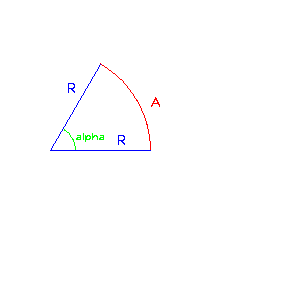

In [109]:
img = np.zeros((300, 300, 3), dtype="uint8")
img[:] = (255,255,255)
font=cv2.FONT_HERSHEY_PLAIN


draw_arc(50,150,100,60,"", 1)
cv2_imshow(img)

El valor del ángulo oscilará entre 0 (nulo) y 2pi (correspondiente a todo el perímetro del círculo), ylas unidades empleadas son los radianes. Como los ángulos también pueden ser medidos en grados, con valores oscilando entre 0 (nulo) y 360 (correspondiente a todo el perímetro del círculo), la conversión entre grados y radianes es:

In [ ]:
alpha_g, alpha_r = sympy.symbols("alpha_g alpha_r")
Eq  (alpha_g*(pi/180),alpha_r)

Los griegos también definieron dos ratios en un triángulo rectángulo. 



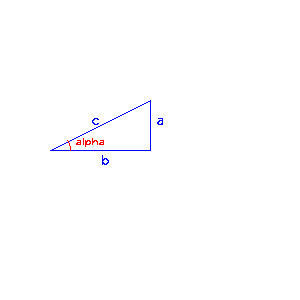

In [54]:
img = np.zeros((300, 300, 3), dtype="uint8")
img[:] = (255,255,255)
font=cv2.FONT_HERSHEY_PLAIN

def draw_triangle(x: int, y: int, a: int, b: int):
  pts = np.array([[x, y], [x+b, y], [x+b, y-a]], np.int32)
  # Creating a blue triangle
  cv2.polylines(img, [pts], True, (255,0,0), 1)
  cv2.putText(img,"b", (x+int(b/2),y+15), font, 1, (255,0,0), 1, cv2.LINE_4)
  cv2.putText(img,"a", (x+b+5,(y-a) + int(a/2)), font, 1, (255,0,0), 1, cv2.LINE_4)
  cv2.putText(img,"c", (x+int(b/2)-10,y-int(a/2)), font, 1, (255,0,0), 1, cv2.LINE_4)

  import math
  angle = math.asin(a/math.sqrt(a*+2 + b**2)) * 180 / np.pi
  cv2.ellipse(img, (x,y), (int(b/5),int(b/5)), 0, 0, -angle, (0,0,255), (1))
  cv2.putText(img,"alpha", (x+25,y-5), font, 0.7, (0,0,255), 1, cv2.LINE_4)

draw_triangle(50,150,50,100)
cv2_imshow(img)

Definieron como seno de un ángulo al ratio entre el cateto opuesto al ángulo y la hipotenusa, y como coseno del ángulo al ratio entre el cateto adyacente al ángulo y la hipotenusa. Porqué? porque este ratio es contante para todos los triángulos rectángulos definidos a partir de ese ángulo.

In [119]:
a, b, c = sympy.symbols("a b c")

Eq(sin(alpha), a/c)


In [ ]:
Eq(cos(alpha), b/c)

In [124]:
Eq(sin(alpha)/cos(alpha), a/b)

In [125]:
Eq(tan(alpha), a/b)

Con este conocimiento, es sencillo probar fórmulas trigronométricas como:

In [ ]:
Eq(sin(alpha)**2 + cos(alpha)**2, 1)

Sustituyendo seno y coseno por su definición en ratios:

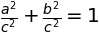

In [ ]:
Eq((a/c)**2 + (b/c)**2, 1)

quedando:

In [ ]:
Eq(a**2 + b**2, c**2)

lo que corresponde al teorema de Pitágonas, por lo que si demostramos este teorema, entonces queda demostrada también la fórmula trigronométrica. Es decir, hemos **reducido** la prueba de la fórmula trigronométrica a la prueba del teorema de Pitágoras. 

Usaremos una prueba gráfica:

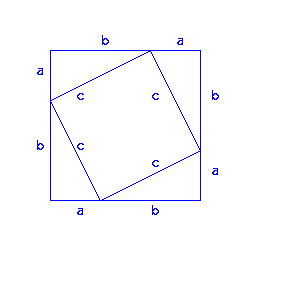

In [113]:
img = np.zeros((300, 300, 3), dtype="uint8")
img[:] = (255,255,255)
font=cv2.FONT_HERSHEY_PLAIN

x=100
y=200
a=50
b=100
pts = np.array([[x, y], [x+b, y], [x+b, y-a]], np.int32)
cv2.polylines(img, [pts], True, (255,0,0), 1)

pts = np.array([[x, y], [x-a, y], [x-a, y-b]], np.int32)
cv2.polylines(img, [pts], True, (255,0,0), 1)

pts = np.array([[x-a, y-b], [x-a, y-b-a], [x-a+b, y-b-a]], np.int32)
cv2.polylines(img, [pts], True, (255,0,0), 1)

pts = np.array([[x+b, y-a], [x+b, y-a-b], [x+b-a, y-a-b]], np.int32)
cv2.polylines(img, [pts], True, (255,0,0), 1)

cv2.putText(img,"a", (x-int(a/2),y+15), font, 1, (255,0,0), 1, cv2.LINE_4)
cv2.putText(img,"b", (x+int(b/2),y+15), font, 1, (255,0,0), 1, cv2.LINE_4)
cv2.putText(img,"c", (x+int(b/2),y-int(2*a/3)), font, 1, (255,0,0), 1, cv2.LINE_4)

cv2.putText(img,"b", (x-a-15,y-int(b/2)), font, 1, (255,0,0), 1, cv2.LINE_4)
cv2.putText(img,"a", (x-a-15,y-b-int(a/2)), font, 1, (255,0,0), 1, cv2.LINE_4)
cv2.putText(img,"c", (x-int(a/2),y-int(b/2)), font, 1, (255,0,0), 1, cv2.LINE_4)

cv2.putText(img,"a", (x+b+10,y-int(a/2)), font, 1, (255,0,0), 1, cv2.LINE_4)
cv2.putText(img,"b", (x+b+10,y-a-int(b/2)), font, 1, (255,0,0), 1, cv2.LINE_4)
cv2.putText(img,"c", (x-int(a/2),y-b), font, 1, (255,0,0), 1, cv2.LINE_4)


cv2.putText(img,"b", (x-a+int(b/2),y-a-b-5), font, 1, (255,0,0), 1, cv2.LINE_4)
cv2.putText(img,"a", (x+b-int(a/2),y-a-b-5), font, 1, (255,0,0), 1, cv2.LINE_4)
cv2.putText(img,"c", (x+int(b/2),y-b), font, 1, (255,0,0), 1, cv2.LINE_4)

cv2_imshow(img)

Usando los teoremas:

1.   Los ángulos de un triángulo rectángulo suman 90 grados
2.   El ángulo entre dos puntos de una recta es 180 grados

Podemos confirmar que el polígono inscrito en el cuadrado de lado a+b es a su vez un cuadrado de lado c, pues tiene 4 ángulos de 90 grados (debido a #1 y #2) y los cuatro lados iguales. Con ello, podemos igualar el área del cuadrado de lado a+b con el área de los 4 triángulos y el cuadrado de lado c inscritos en él:



In [126]:
Eq((a+b)**2, c**2 + 4*(a*b/2))

Desarrollando:

In [128]:
Eq(a**2+b**2,c**2)

QED, tanto para el teorema de Pitágoras como para la fómula trigronométrica de suma de cuadrados de seno y coseno sea igual a 1.

Tenemos ya las herramientas necesarias, así que ahora podemos centrarnos en el modelo de Erasthotenes descrito por Carl Sagan, donde las pondremos en uso para determinar el radio de la Tierra:

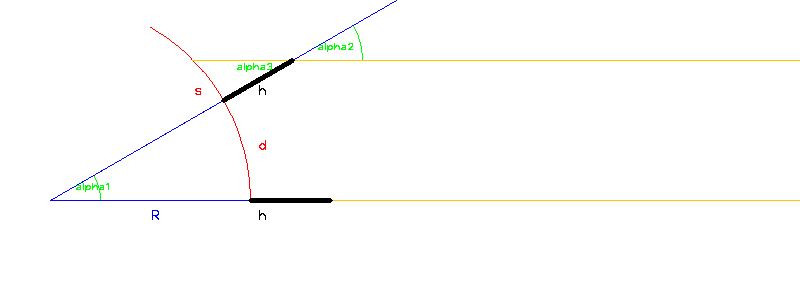

In [133]:
img = np.zeros((300, 800, 3), dtype="uint8")
img[:] = (255,255,255)
font=cv2.FONT_HERSHEY_PLAIN

x=50
y=200
sun_distance = 800
radius = 200
pole_height=80
angle=60

from typing import Tuple
def draw_arc2(x: int,y: int,radius: int,angle: int, color: Tuple[int,int,int], display: int=0, text: str=""):
  
  cv2.ellipse(img, (x,y), (radius,radius), 0, 0, -angle, color, (1))
  if display:
    cv2.ellipse(img, (x,y), (int(radius/4),int(radius/4)), 0, 0, -angle, (0,255,0), (1))
    cv2.putText(img,"alpha"+text, (x+25,y-10), font, 0.7, (0,255,0), 1, cv2.LINE_4)

  cv2.line(img, (x,y), (x+radius,y), (255,0,0), (1))

  import math
  import numpy as np
  c1 = int(math.cos(angle*(np.pi/180)) * radius)
  c2 = int(math.sqrt((radius**2 - c1**2)))
  cv2.line(img, (x,y), (x+c1,y-c2), (255,0,0), (1))

  return (x+c1,y-c2)



cv2.ellipse(img, (x,y), (radius,radius), 0, 0, -angle, (0,0,255), (1))
(x2,y2) = draw_arc2(x,y,radius, 30, (0,0,255),1,"1")
(x3,y3) = draw_arc2(x,y,radius+pole_height, 30, (255,255,255))
draw_arc2(x3,y3,radius+pole_height, 30, (255,255,255),1,"2")

#sun rays
cv2.line(img, (x+sun_distance,y), (x+radius,y), (0,200,255), (1))
cv2.line(img, (x+sun_distance,y3), (x3-int(radius/2),y3), (0,200,255), (1))

#poles
cv2.line(img, (x+radius+pole_height,y), (x+radius,y), (0,0,0), (3))
cv2.line(img, (x2,y2), (x3,y3), (0,0,0), (3))


cv2.putText(img,"h", (x2+int((x3-x2)/2),y2-int((y2-y3)/8)), font, 1, (0,0,0), 1, cv2.LINE_4)
cv2.putText(img,"h", (x2+int((x3-x2)/2),y+20), font, 1, (0,0,0), 1, cv2.LINE_4)
cv2.putText(img,"d", (x2+int((x3-x2)/2),y-int((y-y2)/2)), font, 1, (0,0,255), 1, cv2.LINE_4)
cv2.putText(img,"s", (x2-30,y2-int((y2-y3)/8)), font, 1, (0,0,255), 1, cv2.LINE_4)
cv2.putText(img,"alpha3", (x2+int((x3-x2)/5),y3+10), font, 0.7, (0,255,0), 1, cv2.LINE_4)
cv2.putText(img,"R", (x+int(radius/2),y+20), font, 1, (255,0,0), 1, cv2.LINE_4)


cv2_imshow(img)

Donde:  

*   El arco rojo es la superficies de la Tierra de radio **R**,
*   Las lineas amarillas son los rayos de sol. Se puede asumir que son paralelos 
*   **h** es la altura del palo de sombra
*   **s** es la sombra que hace el palo en una latitud determinada
*   **d** es la distancia entre los dos palos en la superficie de la Tierra


Resulta que alpha2 y alpha3 son el mismo ángulo por la [proposición XV](https://www.c82.net/euclid/es/book1/#prop15) de Euclides. alpha1 y alpha3 son el mismo ángulo por la [proposición XXIX](https://www.c82.net/euclid/es/book1/#prop29) de Euclides. Por tanto, tenemos las ecuaciones:

Asumiendo que el triángulo formado por s y h es un triángulo rectángulo (en un espacio pequeño, se puede considerar la superficie de la tierra como plana, y el palo se puede clavar perpendicular al suelo), tenemos:

In [135]:
s, h, d, R = sympy.symbols("s h d R")
Eq(tan(alpha), s/h)

Es decir, que el ángulo alpha es:

In [136]:
Eq(alpha, atan(s/h))

Y dado que alpha es también el ratio en el radio R y el arco d:

In [137]:
Eq(R, d/alpha)